In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
data = pd.read_csv('data_arrhythmia.csv',delimiter=';',na_values = ['?'])

In [4]:
data

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [5]:
data.dtypes

age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object

In [6]:
sum(data['diagnosis'] ==1) # normal arrhythmia cases

245

In [7]:
sum(data['diagnosis'] != 1) #Risky arrhythmia cases

207

In [8]:
df1 = data.copy()

df1.loc[df1["diagnosis"] == 1,"diagnosis"] = "Normal"         
df1.loc[df1["diagnosis"] != "Normal","diagnosis"] = "Risk"
df1.diagnosis.value_counts()

Normal    245
Risk      207
Name: diagnosis, dtype: int64

In [9]:
df1

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,Risk
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,Risk
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,Risk
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,Normal
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,Risk
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,Risk
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,Normal


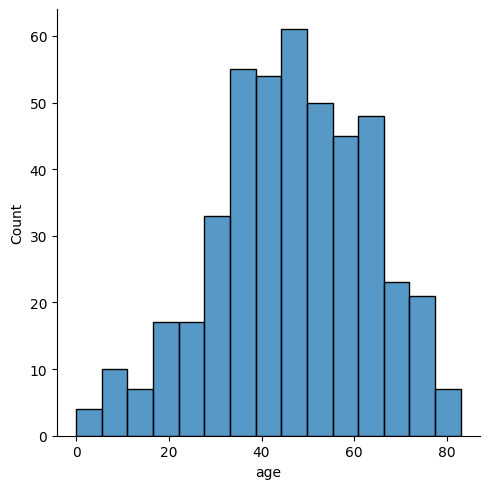

In [14]:
sns.displot(data['age'])

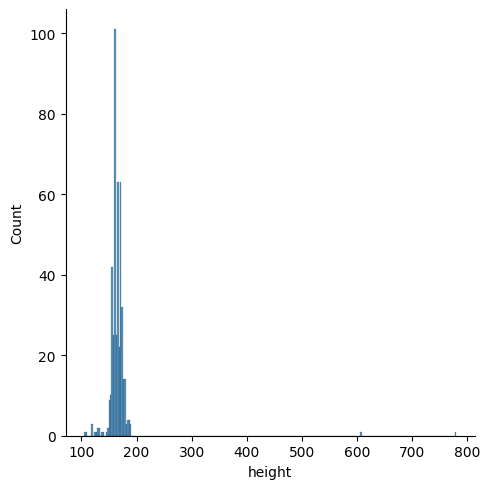

In [16]:
sns.displot(data['height'])

In [38]:
df1['height'].value_counts().sort_index()

height
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
608     1
780     1
Name: count, dtype: int64

In [39]:
df1[df1['height']==780]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0,1.3,0.7,2.7,5.5,Risk


In [40]:
df1.loc[df1["height"] == 780, "height"] = 78

In [41]:
df1['age'].value_counts().sort_index()

age
0     1
1     2
3     1
7     3
8     2
     ..
78    2
79    1
80    2
81    1
83    1
Name: count, Length: 77, dtype: int64

In [42]:
df1[df1['age']==0]

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0,0.5,2.5,-11.8,1.7,Risk


In [43]:
df1.loc[df1["age"] == 0, "height"] = 61

In [48]:
df1.drop(columns=["S'_wave",'CB','CD','CS','EV','EY','FF','FH','FJ','FL','FS','FZ','GA','GH','IB','KP','LC'],inplace=True)

In [49]:
df1

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,Risk
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,Risk
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,Risk
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,Normal
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,Risk
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,Risk
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,Normal


In [50]:
missing = df1.isnull().sum()
missing_df = pd.DataFrame(missing)
missing_df[missing_df[0]!=0]

,0
T,8
P,22
QRST,1
J,376
heart_rate,1


In [51]:
df1.drop(columns=['J'],inplace=True)

C:\Users\Ronit Murpani\AppData\Local\Temp\ipykernel_14324\1800709618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for feature in missing_features: sns.distplot(data[feature])
C:\Users\Ronit Murpani\AppData\Local\Temp\ipykernel_14324\1800709618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  for feature in miss

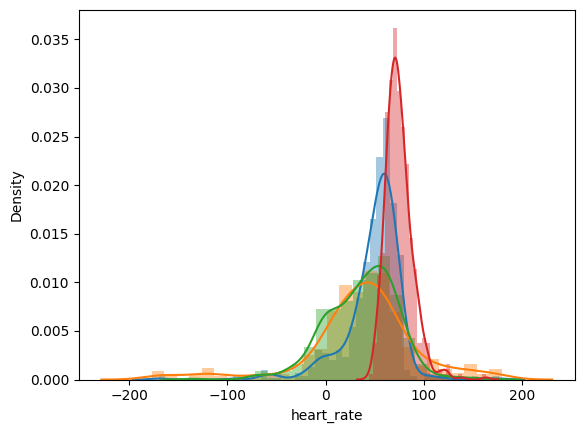

In [53]:
missing_features = ['P','T','QRST','heart_rate'] #list pf features with missing data

for feature in missing_features: 
    sns.distplot(data[feature])

As the data is left skewed we fill missing values with median

In [73]:
missing = df2.isnull().sum()
missing_df = pd.DataFrame(missing)
missing_df[missing_df[0]!=0]

,0
T,8
P,22
QRST,1
heart_rate,1


In [75]:
X_df = df2.loc[:,df2.columns != 'diagnosis']
df2_filled = X_df.fillna(X_df.median())

In [76]:
df2_filled

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KU,KV,KY,KZ,LA,LB,LD,LE,LF,LG
0,75,0,190,80,91,193,371,174,121,-16,...,62.9,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,48.2,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,68.0,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,48.9,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-0.6,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,82.5,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,-63.6,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,61.0,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6


In [122]:
df2

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,Risk
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,Risk
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,Risk
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,Normal
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,Risk
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,Risk
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,Normal


In [77]:
missing1 = df2_filled.isnull().sum()
missing_df1 = pd.DataFrame(missing1)
missing_df1[missing_df1[0]!=0]

,0


In [81]:
from sklearn.model_selection import train_test_split
y = df2.iloc[:,-1] #subset target label

# splitting train and test data with same seed (random_state=1)
X_train, X_test, y_train, y_test = train_test_split(df2_filled, y, test_size=0.3, random_state=1) #70%/30% splitting

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 261)
(136, 261)
(316,)
(136,)


In [82]:
print('Normal instances in test set: ' + str(sum(y_test=="Normal")))
print('Risk instances in test set: ' + str(sum(y_test=="Risk"))) 

Normal instances in test set: 73
Risk instances in test set: 63


# Base Modeling

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf1 = RandomForestClassifier(n_estimators=595,random_state=1) #create classifier object
fit_model1 = clf1.fit(X_train,y_train) #train classifier
y_pred1 = fit_model1.predict(X_test) #create predictions vector

cm_m1 = metrics.confusion_matrix(y_test,y_pred1)
print("Confusion matrix:")
print(cm_m1)

print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred1)*100,2))+"%")

Confusion matrix:
[[64  9]
 [15 48]]
Accuracy: 82.35%


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
fit_model2 = lr.fit(X_train,y_train)
y_pred2 = fit_model2.predict(X_test)

cm_m2 = metrics.confusion_matrix(y_test,y_pred2)
print("Confusion matrix:")
print(cm_m2)

print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred2)*100,2))+"%")

Confusion matrix:
[[50 23]
 [19 44]]
Accuracy: 69.12%


C:\Users\Ronit Murpani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB = GaussianNB()
fit_model3 = NB.fit(X_train, y_train)
y_pred3 = fit_model3.predict(X_test)

cm_m3 = metrics.confusion_matrix(y_test,y_pred3)
print("Confusion matrix:")
print(cm_m3)

print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred3)*100,2))+"%")

Confusion matrix:
[[68  5]
 [32 31]]
Accuracy: 72.79%


In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNN = KNeighborsClassifier()
fit_model4 = KNN.fit(X_train, y_train)
y_pred4 = fit_model4.predict(X_test)

cm_m4 = metrics.confusion_matrix(y_test,y_pred4)
print("Confusion matrix:")
print(cm_m4)

print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred4)*100,2))+"%")

Confusion matrix:
[[68  5]
 [36 27]]
Accuracy: 69.85%


In [116]:
from sklearn.svm import SVC
from sklearn import metrics

svm = SVC()
fit_model5 = svm.fit(X_train,y_train)
y_pred5 = fit_model5.predict(X_test)

cm_m5 = metrics.confusion_matrix(y_test,y_pred5)
print("Confusion matrix:")
print(cm_m5)

print("Accuracy: " + str(round(metrics.accuracy_score(y_test, y_pred5)*100,2))+"%")

Confusion matrix:
[[65  8]
 [32 31]]
Accuracy: 70.59%


Random forest works best for our use case

Now we will try to increase accuracy by feature selection

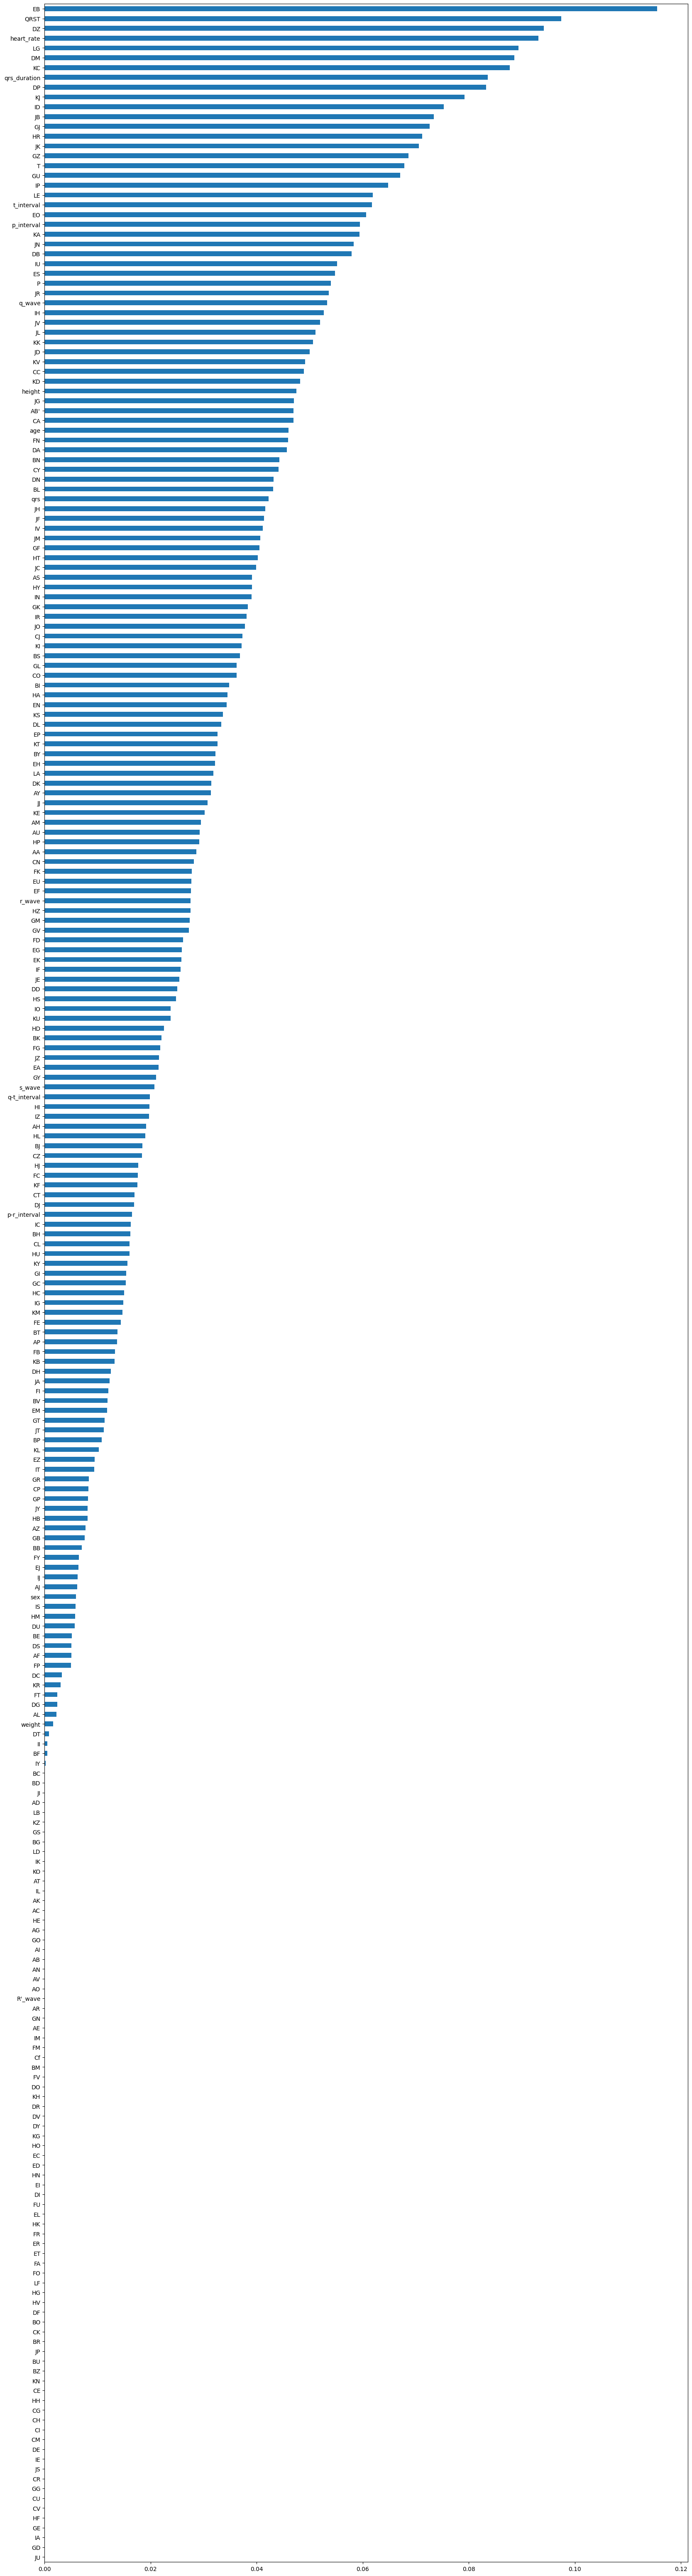

In [164]:
plt.figure(figsize=(20,80))
from sklearn.feature_selection import mutual_info_classif
important_features = mutual_info_classif(df2_filled, y)
features = pd.Series(important_features, df2.columns[0:len(df2.columns)-1]).sort_values() 
features.plot(kind='barh')
plt.show()

In [140]:
important_features

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [147]:
threshold = 0.01

# Filter features based on threshold
selected_features = df2_filled.columns[important_features > threshold]

print("Selected important features:", selected_features)

Selected important features: Index(['QRST', 'heart_rate', 'BJ', 'CY', 'DD', 'DM', 'DP', 'DU', 'EB', 'FG',
       'FO', 'IN', 'IP', 'IR', 'IS', 'JB', 'JO', 'KA', 'KC', 'KD', 'KJ', 'LG'],
      dtype='object')


,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,-0.3,0.0,9.0,-0.9,0.0,0.9,2.9,23.3,49.4,Risk
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8,Risk
2,54,0,172,95,138,163,386,185,102,96,...,0.9,0.0,9.5,-2.4,0.0,0.3,3.4,12.3,49.0,Risk
3,55,0,175,94,100,202,380,179,143,28,...,0.1,0.0,12.2,-2.2,0.0,0.4,2.6,34.6,61.6,Normal
4,75,0,190,80,88,181,360,177,103,-16,...,-0.4,0.0,13.1,-3.6,0.0,-0.1,3.9,25.4,62.8,Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,0.0,4.3,-5.0,0.0,0.7,0.6,-4.4,-0.5,Normal
448,37,0,190,85,100,137,361,201,73,86,...,-0.5,0.0,15.6,-1.6,0.0,0.4,2.4,38.0,62.4,Risk
449,36,0,166,68,108,176,365,194,116,-85,...,1.2,0.0,16.3,-28.6,0.0,1.5,1.0,-44.2,-33.2,Risk
450,32,1,155,55,93,106,386,218,63,54,...,0.2,-0.4,12.0,-0.7,0.0,0.5,2.4,25.0,46.6,Normal
